# How long is the blacklist (With PyMC3)?
> A Bayesian approach using PyMC3

- toc: true 
- badges: true
- comments: true
- categories: [Bayesian, PyMC3]
- image: images/2020-05-20-How-Long-Is-The-Blacklist-With-PyMC3/header.jpg


## Bayes in Brief.

There are many other, far better blog posts which cover this topic, in particular this [one](https://www.isaacslavitt.com/2015/12/19/german-tank-problem-with-pymc-and-pystan/).

$P(H|E) = \frac{P(E|H) P(H)}{P(E)}$


## Putting it into practice
Now, let's look at all the episodes, from the seasons that have been aired:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [15, 15]

# E: the data
y = np.array([52, 145, 84, 161, 85, 152,
       47, 109, 16, 16, 106, 101,
       64, 73, 57, 83, 88, 135,
       119,120,121, 122, 42, 8, 8, 104, 112,
       89, 82, 74, 114, 22, 12,
       21, 21, 67, 71, 93, 94,
       75, 7, 97, 117, 62, 87,
       55, 11, 38, 80, 72, 43,
       50, 86, 31, 108, 24, 24,
       95, 132, 103, 77, 113, 78,
       32, 32, 41, 18, 14, 14,
       79, 66, 65, 81, 105, 53,
       98, 98, 111, 163, 102,
       34, 107, 59, 10, 61, 29,
       46, 4, 4, 30, 37, 76, 44,
       54, 90, 48, 13, 118, 100,
       56, 63, 51, 68, 19, 25,
       23, 13, 110, 26, 17, 33,
       20, 124, 146, 147, 131, 91, 116,
       58, 99, 160, 20, 20, 9,
        6, 115, 69, 136, 92, 128,
       60, 15, 27, 27, 151, 138,
       130, 125, 162, 159, 3, 137,
       155, 144, 126, 158, 149,
       150])

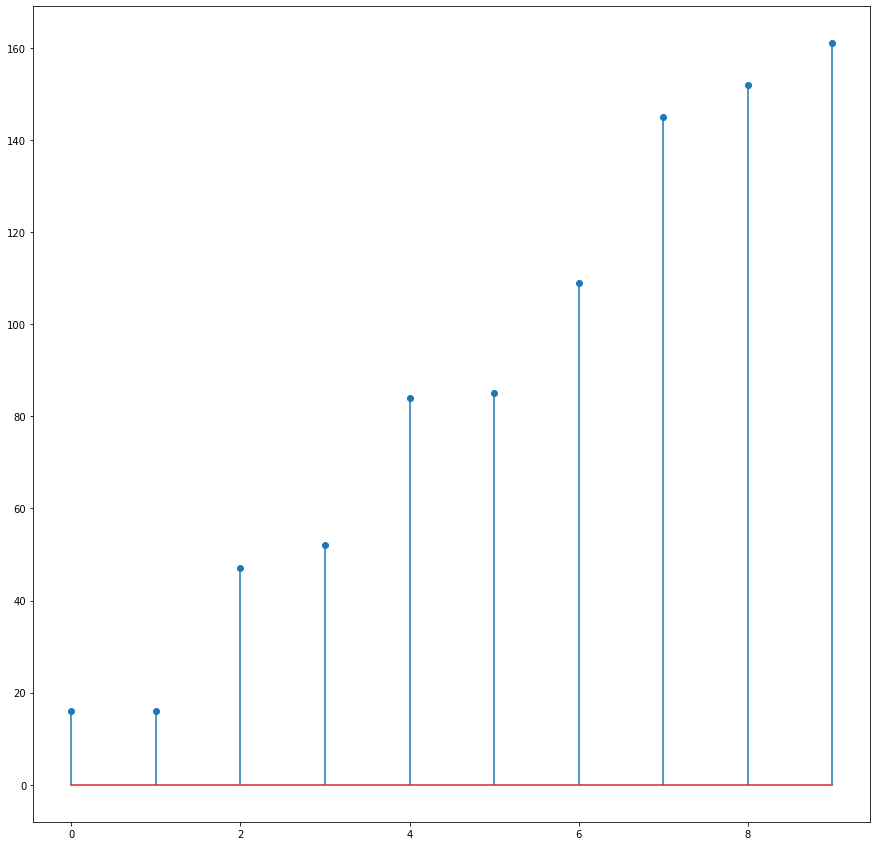

In [2]:
y_sample = y[0:10]
plt.stem(np.sort(y_sample), use_line_collection=True)
plt.show()

In [3]:
import pymc3 as pm

model = pm.Model()
with model:
    # prior - P(N): N ~ uniform(max(y), 500)
    # note: we use a large-ish number for the upper bound
    N = pm.DiscreteUniform("N", lower=y.max(), upper=200)

    # likelihood - P(D|N): y ~ uniform(0, N)
    y_obs = pm.DiscreteUniform("y_obs", lower=0, upper=N, observed=y)

    # choose the sampling method - we have to use Metropolis-Hastings because
    # the variables are discrete
    step = pm.Metropolis()
    
    # we'll use four chains, and parallelize to four cores
    start = {"N": y.max()} # the highest number is a reasonable starting point
    trace = pm.sample(100000, step, start)  

Multiprocess sampling (2 chains in 2 jobs)
Metropolis: [N]
Sampling 2 chains, 0 divergences: 100%|██████████| 201000/201000 [00:29<00:00, 6758.79draws/s]
The number of effective samples is smaller than 10% for some parameters.


array([<matplotlib.axes._subplots.AxesSubplot object at 0x127676cd0>],
      dtype=object)

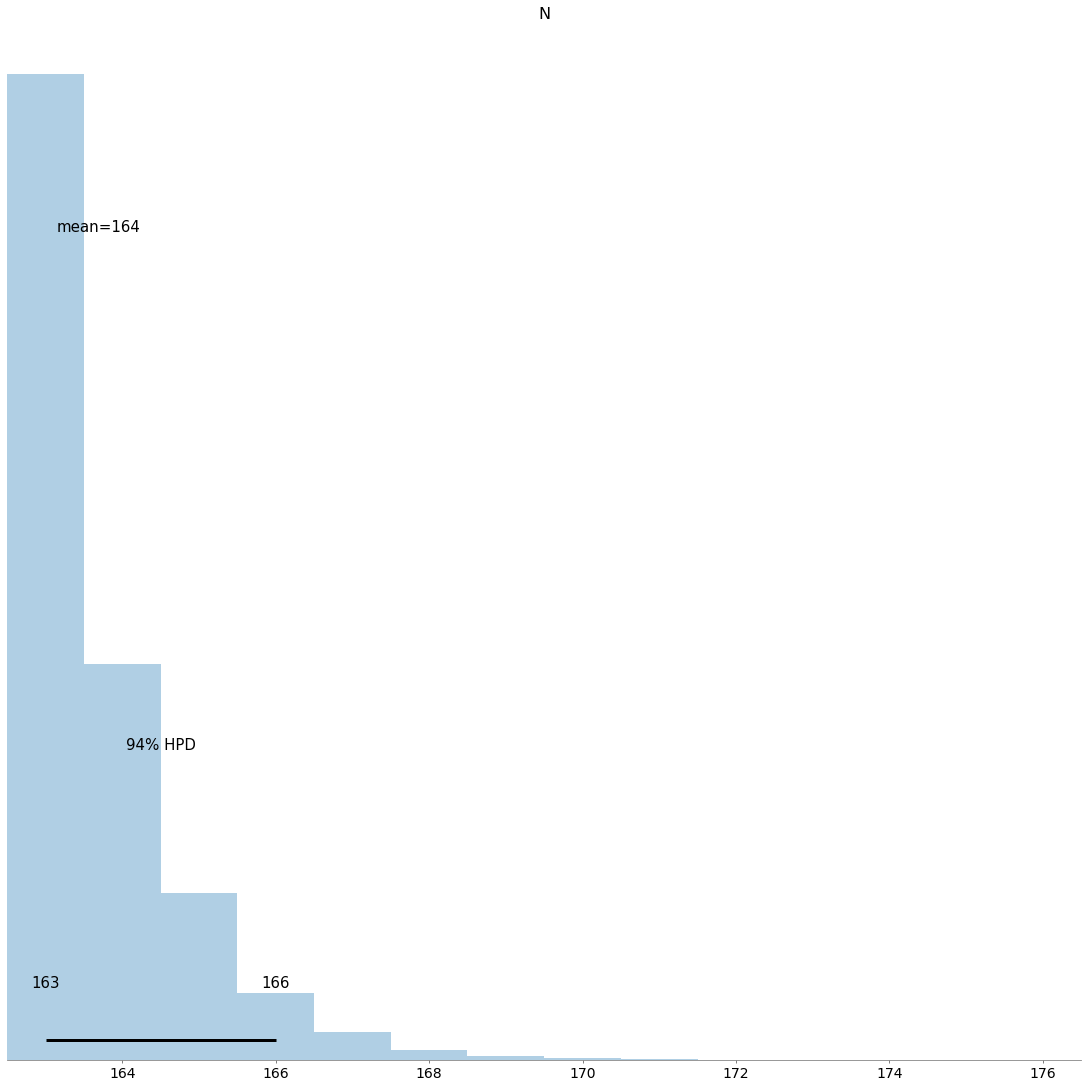

In [15]:
pm.plots.plot_posterior(trace)